# Global Comparison
The purpose of this notebook is to compare countries' statistics on safety, education, healthcare and level of English spoken to find out what countries would make the "short list" for someone to want to live there. 

# Imports

In [121]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import colormaps
from matplotlib.colors import ListedColormap

# Load Data

In [22]:
#path for the excel with all of the statistics
fp = 'World Stats.xlsx'

In [23]:
#get generic world map
world = gpd.read_file('ne_110m_admin_0_countries.shp')
pd.set_option('display.max_columns', None)
world.head(3)

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,ADM0_A3,GEOU_DIF,GEOUNIT,GU_A3,SU_DIF,SUBUNIT,SU_A3,BRK_DIFF,NAME,NAME_LONG,BRK_A3,BRK_NAME,BRK_GROUP,ABBREV,POSTAL,FORMAL_EN,FORMAL_FR,NAME_CIAWF,NOTE_ADM0,NOTE_BRK,NAME_SORT,NAME_ALT,MAPCOLOR7,MAPCOLOR8,MAPCOLOR9,MAPCOLOR13,POP_EST,POP_RANK,POP_YEAR,GDP_MD,GDP_YEAR,ECONOMY,INCOME_GRP,FIPS_10,ISO_A2,ISO_A2_EH,ISO_A3,ISO_A3_EH,ISO_N3,ISO_N3_EH,UN_A3,WB_A2,WB_A3,WOE_ID,WOE_ID_EH,WOE_NOTE,ADM0_ISO,ADM0_DIFF,ADM0_TLC,ADM0_A3_US,ADM0_A3_FR,ADM0_A3_RU,ADM0_A3_ES,ADM0_A3_CN,ADM0_A3_TW,ADM0_A3_IN,ADM0_A3_NP,ADM0_A3_PK,ADM0_A3_DE,ADM0_A3_GB,ADM0_A3_BR,ADM0_A3_IL,ADM0_A3_PS,ADM0_A3_SA,ADM0_A3_EG,ADM0_A3_MA,ADM0_A3_PT,ADM0_A3_AR,ADM0_A3_JP,ADM0_A3_KO,ADM0_A3_VN,ADM0_A3_TR,ADM0_A3_ID,ADM0_A3_PL,ADM0_A3_GR,ADM0_A3_IT,ADM0_A3_NL,ADM0_A3_SE,ADM0_A3_BD,ADM0_A3_UA,ADM0_A3_UN,ADM0_A3_WB,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_LEN,LONG_LEN,ABBREV_LEN,TINY,HOMEPART,MIN_ZOOM,MIN_LABEL,MAX_LABEL,LABEL_X,LABEL_Y,NE_ID,WIKIDATAID,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FA,NAME_FR,NAME_EL,NAME_HE,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_UK,NAME_UR,NAME_VI,NAME_ZH,NAME_ZHT,FCLASS_ISO,TLC_DIFF,FCLASS_TLC,FCLASS_US,FCLASS_FR,FCLASS_RU,FCLASS_ES,FCLASS_CN,FCLASS_TW,FCLASS_IN,FCLASS_NP,FCLASS_PK,FCLASS_DE,FCLASS_GB,FCLASS_BR,FCLASS_IL,FCLASS_PS,FCLASS_SA,FCLASS_EG,FCLASS_MA,FCLASS_PT,FCLASS_AR,FCLASS_JP,FCLASS_KO,FCLASS_VN,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,FJI,0,Fiji,FJI,0,Fiji,FJI,0,Fiji,Fiji,FJI,Fiji,None,Fiji,FJ,Republic of Fiji,None,Fiji,None,None,Fiji,None,5,1,2,2,889953.0,11,2019,5496,2019,6. Developing region,4. Lower middle income,FJ,FJ,FJ,FJI,FJI,242,242,242,FJ,FJI,23424813,23424813,Exact WOE match as country,FJI,None,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,-99,-99,Oceania,Oceania,Melanesia,East Asia & Pacific,4,4,4,-99,1,0.0,3.0,8.0,177.975427,-17.826099,1159320625,Q712,فيجي,ফিজি,Fidschi,Fiji,Fiyi,فیجی,Fidji,Φίτζι,פיג'י,फ़िजी,Fidzsi-szigetek,Fiji,Figi,フィジー,피지,Fiji,Fidżi,Fiji,Фиджи,Fiji,Fiji,Фіджі,فجی,Fiji,斐济,斐濟,Admin-0 country,None,Admin-0 country,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,TZA,0,Tanzania,TZA,0,Tanzania,TZA,0,Tanzania,Tanzania,TZA,Tanzania,None,Tanz.,TZ,United Republic of Tanzania,None,Tanzania,None,None,Tanzania,None,3,6,2,2,58005463.0,16,2019,63177,2019,7. Least developed region,5. Low income,TZ,TZ,TZ,TZA,TZA,834,834,834,TZ,TZA,23424973,23424973,Exact WOE match as country,TZA,None,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,-99,-99,Africa,Africa,Eastern Africa,Sub-Saharan Africa,8,8,5,-99,1,0.0,3.0,8.0,34.959183,-6.051866,1159321337,Q924,تنزانيا,তানজানিয়া,Tansania,Tanzania,Tanzania,تانزانیا,Tanzanie,Τανζανία,טנזניה,तंज़ानिया,Tanzánia,Tanzania,Tanzania,タンザニア,탄자니아,Tanzania,Tanzania,Tanzânia,Танзания,Tanzania,Tanzanya,Танзанія,تنزانیہ,Tanzania,坦桑尼亚,坦尚尼亞,Admin-0 country,None,Admin-0 country,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,SAH,0,Western Sahara,SAH,0,Western Sahara,SAH,1,W. Sahara,Western Sahara,B28,W. Sahara,None,W. Sah.,WS,Sahrawi Arab Democratic Republic,None,Western Sahara,None,Self admin.; Claimed by Morocco,Western Sahara,None,4,7,4,4,603253.0,11,2017,907,2007,7. Least develope

In [24]:
#load all of the worldwide data, remove the empty/source lines, clean up for consistency
GPI = pd.read_excel(fp, sheet_name='Global Peace Index').dropna(subset=['score']).rename(columns={'region': 'Country'})
edu = pd.read_excel(fp, sheet_name='Education').dropna(subset=['Ed 2022'])
ESL = pd.read_excel(fp, sheet_name='English Second Lang').dropna(subset=['Proficiency Score'])
neng = pd.read_excel(fp, sheet_name='Native English').dropna(subset=['englishSpeakingCountries_isPrimary']).rename(columns={'country': 'Country'})
health = pd.read_excel(fp, sheet_name='Healthcare').dropna(subset=['LP Index Health Score 2023'])

# Clean Up Data

## Find the country names that are inconsistent between data sources and fix them

In [25]:
world['ADMIN'] = world['ADMIN'].replace({
    "United Republic of Tanzania": "Tanzania",
    "Republic of Serbia": "Serbia",
    "eSwatini": "Eswatini",
    "East Timor": "Timor-Leste"
})

GPI['Country'] = GPI['Country'].replace({
    "Cote d' Ivoire": "Ivory Coast",
    "The Gambia": "Gambia",
    "Turkiye": "Turkey",
    "Kyrgyz Republic": "Kyrgyzstan"
})

edu['Country'] = edu['Country'].replace({
    "United States": "United States of America",
    "DR Congo": "Democratic Republic of the Congo",
    "Bahamas": "The Bahamas",
    "Guinea Bissau": "Guinea-Bissau",
    "Czech Republic": "Czechia",
    "Timor Leste": "Timor-Leste"
})

ESL['Country'] = ESL['Country'].replace({
    "DR Congo": "Democratic Republic of the Congo",
    "Czech Republic": "Czechia",
})

neng['Country'] = neng['Country'].replace({
    "United States": "United States of America",
    "Bahamas": "The Bahamas"
})

health['Country'] = health['Country'].replace({
    "United States": "United States of America",
    "Czech Republic": "Czechia",
    "DR Congo": "Democratic Republic of the Congo",
    "Guinea Bissau": "Guinea-Bissau"
})

## Merge the data sets

In [26]:
#we don't need all the columns from the world file
world_selected = world[['featurecla', 'TYPE', 'ADMIN', 'GEOUNIT', 'ADM0_A3', 'NAME', 
                        'NAME_LONG', 'FORMAL_EN', 'geometry', 'CONTINENT', 'WOE_ID', 'WOE_ID_EH']]


In [27]:
#Merge world with GPI, but don't lose data just because the map doesn't draw that country
worlddata = GPI.merge(world_selected, left_on='Country', right_on='ADMIN', how='outer', indicator=True)
#double-check which names are different between the sources
mismatchesl = worlddata[worlddata['_merge'] == 'left_only'].drop(columns=['_merge'])['Country']
mismatches2 = worlddata[worlddata['_merge'] == 'right_only'].drop(columns=['_merge'])['ADMIN']
print(mismatchesl)
print(mismatches2)
#create a "master" name column
worlddata['Master Name'] = np.where(worlddata['ADMIN'].notna(), worlddata['ADMIN'], worlddata['Country'])
worlddata.head()

4     Singapore
21    Mauritius
81      Bahrain
Name: Country, dtype: object
163                                   Fiji
164                         Western Sahara
165                            The Bahamas
166                       Falkland Islands
167                              Greenland
168    French Southern and Antarctic Lands
169                                 Belize
170                               Suriname
171                            Puerto Rico
172                                Vanuatu
173                             Luxembourg
174                          New Caledonia
175                        Solomon Islands
176                                 Brunei
177                             Antarctica
178                        Northern Cyprus
179                             Somaliland
Name: ADMIN, dtype: object


,rank,Country,score,featurecla,TYPE,ADMIN,GEOUNIT,ADM0_A3,NAME,NAME_LONG,FORMAL_EN,geometry,CONTINENT,WOE_ID,WOE_ID_EH,_merge,Master Name
0,1,Iceland,1.112,Admin-0 country,Sovereign country,Iceland,Iceland,ISL,Iceland,Iceland,Republic of Iceland,"POLYGON ((-14.5087 66.45589, -14.73964 65.8087...",Europe,23424845.0,23424845.0,both,Iceland
1,2,Ireland,1.303,Admin-0 country,Sovereign country,Ireland,Ireland,IRL,Ireland,Ireland,Ireland,"POLYGON ((-6.19788 53.86757, -6.03299 53.15316...",Europe,23424803.0,23424803.0,both,Ireland
2,3,Austria,1.313,Admin-0 country,Sovereign country,Austria,Austria,AUT,Austria,Austria,Republic of Austria,"POLYGON ((16.97967 48.1235, 16.90375 47.71487,...",Europe,23424750.0,23424750.0,both,Austria
3,4,New Zealand,1.323,Admin-0 country,Country,New Zealand,New Zealand,NZL,New Zealand,New Zealand,New Zealand,"MULTIPOLYGON (((176.88582 -40.06598, 176.50802...",Oceania,23424916.0,23424916.0,both,New Zealand
4,5,Singapore,1.339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,left_only,Singapore


In [28]:
#Merge that with the educational data, but don't lose data just because the map doesn't draw that country
worlddata = worlddata.drop(columns=['_merge']).rename(columns={'Country': 'GPICountry'})

worlddata = edu.merge(worlddata, left_on='Country', right_on='Master Name', how='outer', indicator=True)
#double-check which names are different between the sources
mismatchesl = worlddata[worlddata['_merge'] == 'left_only'].drop(columns=['_merge'])['Country']
mismatches2 = worlddata[worlddata['_merge'] == 'right_only'].drop(columns=['_merge'])['Master Name']
print(mismatchesl)
print(mismatches2)
#update the "master" name column
worlddata['Master Name'] = np.where(worlddata['Master Name'].notna(), worlddata['Master Name'], worlddata['Country'])

worlddata.head()


18                                Palau
21                            Hong Kong
28                     Marshall Islands
31                Saint Kitts and Nevis
37                                Malta
43                        Liechtenstein
50                                Tonga
51     Saint Vincent and the Grenadines
58                             Barbados
59                              Grenada
64                  Antigua and Barbuda
68                           Seychelles
80                              Andorra
88                                Samoa
102                          San Marino
103                              Tuvalu
109                            Dominica
115                               Nauru
121                         Saint Lucia
122                            Kiribati
130                            Maldives
134                          Micronesia
142                             Comoros
151               Sao Tome and Principe
155                          Cape Verde


,Country,Ed 2022,Ed 2021,Ed 2020,Ed 2019,Ed 2018,Ed 2017,rank,GPICountry,score,featurecla,TYPE,ADMIN,GEOUNIT,ADM0_A3,NAME,NAME_LONG,FORMAL_EN,geometry,CONTINENT,WOE_ID,WOE_ID_EH,Master Name,_merge
0,Australia,1.01,1.01,1.01,0.92,0.92,0.92,19,Australia,1.536,Admin-0 country,Country,Australia,Australia,AUS,Australia,Australia,Commonwealth of Australia,"MULTIPOLYGON (((147.68926 -40.80826, 148.28907...",Oceania,-90.0,23424748.0,Australia,both
1,Iceland,0.99,0.99,0.97,0.93,0.92,0.91,1,Iceland,1.112,Admin-0 country,Sovereign country,Iceland,Iceland,ISL,Iceland,Iceland,Republic of Iceland,"POLYGON ((-14.5087 66.45589, -14.73964 65.8087...",Europe,23424845.0,23424845.0,Iceland,both
2,New Zealand,0.98,0.99,0.96,0.93,0.92,0.92,4,New Zealand,1.323,Admin-0 country,Country,New Zealand,New Zealand,NZL,New Zealand,New Zealand,New Zealand,"MULTIPOLYGON (((176.88582 -40.06598, 176.50802...",Oceania,23424916.0,23424916.0,New Zealand,both
3,Germany,0.96,0.94,0.95,0.94,0.94,0.94,20,Germany,1.542,Admin-0 country,Sovereign country,Germany,Germany,DEU,Germany,Germany,Federal Republic of Germany,"POLYGON ((14.11969 53.75703, 14.35332 53.24817...",Europe,23424829.0,23424829.0,Germany,both
4,Denmark,0.96,0.95,0.95,0.92,0.92,0.92,8,Denmark,1.382,Admin-0 country,Country,Denmark,Denmark,DNK,Denmark,Denmark,Kingdom of Denmark,"MULTIPOLYGON (((9.92191 54.9831, 9.28205 54.83...",Europe,23424796.0,23424796.0,Denmark,both


In [29]:
#Merge that with the English data, but don't lose data just because the map doesn't draw that country
worlddata = worlddata.drop(columns=['_merge']).rename(columns={'Country': 'eduCountry'})

worlddata = ESL.merge(worlddata, left_on='Country', right_on='Master Name', how='outer', indicator=True)
#double-check which names are different between the sources
mismatchesl = worlddata[worlddata['_merge'] == 'left_only'].drop(columns=['_merge'])['Country']
mismatches2 = worlddata[worlddata['_merge'] == 'right_only'].drop(columns=['_merge'])['Master Name']
print(mismatchesl)
print(mismatches2)
#update the "master" name column
worlddata['Master Name'] = np.where(worlddata['Master Name'].notna(), worlddata['Master Name'], worlddata['Country'])

worlddata.head()

Series([], Name: Country, dtype: object)
113          Australia
114            Iceland
115        New Zealand
116     United Kingdom
117            Ireland
            ...       
200        Puerto Rico
201      New Caledonia
202         Antarctica
203    Northern Cyprus
204         Somaliland
Name: Master Name, Length: 92, dtype: object


,Country,Proficiency Score,Proficiency Band,eduCountry,Ed 2022,Ed 2021,Ed 2020,Ed 2019,Ed 2018,Ed 2017,rank,GPICountry,score,featurecla,TYPE,ADMIN,GEOUNIT,ADM0_A3,NAME,NAME_LONG,FORMAL_EN,geometry,CONTINENT,WOE_ID,WOE_ID_EH,Master Name,_merge
0,Netherlands,647.0,Very high,Netherlands,0.94,0.94,0.93,0.91,0.91,0.91,18,Netherlands,1.527,Admin-0 country,Country,Netherlands,Netherlands,NLD,Netherlands,Netherlands,Kingdom of the Netherlands,"POLYGON ((6.90514 53.48216, 7.09205 53.14404, ...",Europe,-90.0,23424909.0,Netherlands,both
1,Singapore,631.0,Very high,Singapore,0.87,0.85,0.86,0.92,0.92,0.91,5,Singapore,1.339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,Singapore,both
2,Austria,616.0,Very high,Austria,0.87,0.85,0.86,0.86,0.87,0.86,3,Austria,1.313,Admin-0 country,Sovereign country,Austria,Austria,AUT,Austria,Austria,Republic of Austria,"POLYGON ((16.97967 48.1235, 16.90375 47.71487,...",Europe,23424750.0,23424750.0,Austria,both
3,Denmark,615.0,Very high,Denmark,0.96,0.95,0.95,0.92,0.92,0.92,8,Denmark,1.382,Admin-0 country,Country,Denmark,Denmark,DNK,Denmark,Denmark,Kingdom of Denmark,"MULTIPOLYGON (((9.92191 54.9831, 9.28205 54.83...",Europe,23424796.0,23424796.0,Denmark,both
4,Norway,614.0,Very high,Norway,0.95,0.94,0.94,0.93,0.93,0.93,28,Norway,1.638,Admin-0 country,Sovereign country,Norway,Norway,NOR,Norway,Norway,Kingdom of Norway,"MULTIPOLYGON (((15.14282 79.67431, 15.52255 80...",Europe,-90.0,23424910.0,Norway,both


In [30]:
#Merge that with the English data, but don't lose data just because the map doesn't draw that country
worlddata = worlddata.drop(columns=['_merge']).rename(columns={'Country': 'ESLCountry'})

worlddata = neng.merge(worlddata, left_on='Country', right_on='Master Name', how='outer', indicator=True)
#double-check which names are different between the sources
mismatchesl = worlddata[worlddata['_merge'] == 'left_only'].drop(columns=['_merge'])['Country']
mismatches2 = worlddata[worlddata['_merge'] == 'right_only'].drop(columns=['_merge'])['Master Name']
print(mismatchesl)
print(mismatches2)
#update the "master" name column
worlddata['Master Name'] = np.where(worlddata['Master Name'].notna(), worlddata['Master Name'], worlddata['Country'])

worlddata.head()

56                         Curacao
58                            Guam
64                          Jersey
67    United States Virgin Islands
68                     Isle of Man
69                  Cayman Islands
71                         Bermuda
73                  American Samoa
74        Turks and Caicos Islands
75        Northern Mariana Islands
76                    Sint Maarten
77          British Virgin Islands
78                       Gibraltar
81                        Anguilla
82                    Cook Islands
86                            Niue
Name: Country, dtype: object
87                             Netherlands
88                                 Austria
89                                 Denmark
90                                  Norway
91                                  Sweden
                      ...                 
216    French Southern and Antarctic Lands
217                          New Caledonia
218                             Antarctica
219                     

,Country,englishSpeakingCountries_isPrimary,englishSpeakingCountries_deJure,englishSpeakingCountries_deFacto,englishSpeakingCountries_notes,ESLCountry,Proficiency Score,Proficiency Band,eduCountry,Ed 2022,Ed 2021,Ed 2020,Ed 2019,Ed 2018,Ed 2017,rank,GPICountry,score,featurecla,TYPE,ADMIN,GEOUNIT,ADM0_A3,NAME,NAME_LONG,FORMAL_EN,geometry,CONTINENT,WOE_ID,WOE_ID_EH,Master Name,_merge
0,India,No,Yes,No,"Two official: Hindi, English. Neither is legal...",India,504.0,Moderate,India,0.57,0.55,0.54,0.56,0.55,0.56,116,India,2.319,Admin-0 country,Sovereign country,India,India,IND,India,India,Republic of India,"POLYGON ((97.32711 28.26158, 97.40256 27.88254...",Asia,23424848.0,23424848.0,India,both
1,United States of America,Yes,No,Yes,NaN,NaN,NaN,NaN,United States of America,0.91,0.91,0.92,0.90,0.90,0.90,132,United States of America,2.622,Admin-0 country,Country,United States of America,United States of America,USA,United States of America,United States,United States of America,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312...",North America,23424977.0,23424977.0,United States of America,both
2,Pakistan,No,Yes,No,Two official: Urdu and English.,Pakistan,497.0,Low,Pakistan,0.37,0.39,0.37,0.40,0.39,0.39,140,Pakistan,2.783,Admin-0 country,Sovereign country,Pakistan,Pakistan,PAK,Pakistan,Pakistan,Islamic Republic of Pakistan,"POLYGON ((77.83745 35.49401, 76.87172 34.65354...",Asia,23424922.0,23424922.0,Pakistan,both
3,Nigeria,Yes,Yes,Yes,NaN,Nigeria,562.0,High,Nigeria,0.55,0.52,0.53,0.50,0.49,0.48,147,Nigeria,2.907,Admin-0 country,Sovereign country,Nigeria,Nigeria,NGA,Nigeria,Nigeria,Federal Republic of Nigeria,"POLYGON ((2.6917 6.25882, 2.74906 7.87073, 2.7...",Africa,23424908.0,23424908.0,Nigeria,both
4,Bangladesh,No,No,Yes,NaN,Bangladesh,504.0,Moderate,Bangladesh,0.58,0.59,0.58,0.53,0.52,0.51,93,Bangladesh,2.126,Admin-0 country,Sovereign country,Bangladesh,Bangladesh,BGD,Bangladesh,Bangladesh,People's Republic of Bangladesh,"POLYGON ((92.67272 22.04124, 92.65226 21.32405...",Asia,23424759.0,23424759.0,Bangladesh,both


In [31]:
#Merge that with the Healthcare data, but don't lose data just because the map doesn't draw that country
worlddata = worlddata.drop(columns=['_merge']).rename(columns={'Country': 'nengCountry'})

worlddata = health.merge(worlddata, left_on='Country', right_on='Master Name', how='outer', indicator=True)
#double-check which names are different between the sources
mismatchesl = worlddata[worlddata['_merge'] == 'left_only'].drop(columns=['_merge'])['Country']
mismatches2 = worlddata[worlddata['_merge'] == 'right_only'].drop(columns=['_merge'])['Master Name']
print(mismatchesl)
print(mismatches2)
#update the "master" name column
worlddata['Master Name'] = np.where(worlddata['Master Name'].notna(), worlddata['Master Name'], worlddata['Country'])

worlddata.head()

Series([], Name: Country, dtype: object)
167                            Puerto Rico
168                            Timor-Leste
169                                   Fiji
170                        Solomon Islands
171                                 Bhutan
172                                 Brunei
173                            The Bahamas
174                                Vanuatu
175                               Barbados
176                                  Samoa
177                                Curacao
178                            Saint Lucia
179                                   Guam
180                               Kiribati
181                                Grenada
182                             Micronesia
183                                  Tonga
184                                 Jersey
185       Saint Vincent and the Grenadines
186                    Antigua and Barbuda
187           United States Virgin Islands
188                            Isle of Man
189          

,Country,Health Care Index 2024 (CEOWORLD),Health Care Index 2024 (Numbeo),Health Care Exp Index 2024 (Numbeo),LP Index Health Score 2023,Healthcare Ranking 2022 (US News),Healthcare- WHO Index 2000,nengCountry,englishSpeakingCountries_isPrimary,englishSpeakingCountries_deJure,englishSpeakingCountries_deFacto,englishSpeakingCountries_notes,ESLCountry,Proficiency Score,Proficiency Band,eduCountry,Ed 2022,Ed 2021,Ed 2020,Ed 2019,Ed 2018,Ed 2017,rank,GPICountry,score,featurecla,TYPE,ADMIN,GEOUNIT,ADM0_A3,NAME,NAME_LONG,FORMAL_EN,geometry,CONTINENT,WOE_ID,WOE_ID_EH,Master Name,_merge
0,Taiwan,78.72,86.4,158.9,83.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43,Taiwan,1.818,Admin-0 country,Sovereign country,Taiwan,Taiwan,TWN,Taiwan,Taiwan,None,"POLYGON ((121.77782 24.39427, 121.17563 22.790...",Asia,23424971.0,23424971.0,Taiwan,both
1,South Korea,77.70,83.0,151.9,84.80,17.0,0.759,NaN,NaN,NaN,NaN,NaN,South Korea,525.0,Moderate,South Korea,0.88,0.88,0.88,0.86,0.86,0.86,46,South Korea,1.848,Admin-0 country,Sovereign country,South Korea,South Korea,KOR,South Korea,Republic of Korea,Republic of Korea,"POLYGON ((126.17476 37.74969, 126.23734 37.840...",Asia,23424868.0,23424868.0,South Korea,both
2,Australia,74.11,73.1,132.5,80.36,8.0,0.876,Australia,Yes,No,Yes,NaN,NaN,NaN,NaN,Australia,1.01,1.01,1.01,0.92,0.92,0.92,19,Australia,1.536,Admin-0 country,Country,Australia,Australia,AUS,Australia,Australia,Commonwealth of Australia,"MULTIPOLYGON (((147.68926 -40.80826, 148.28907...",Oceania,-90.0,23424748.0,Australia,both
3,Canada,71.32,69.1,126.7,78.88,2.0,0.881,Canada,Yes,Yes,Yes,Primary except in Quebec and Nunavut.,NaN,NaN,NaN,Canada,0.91,0.92,0.91,0.89,0.89,0.89,11,Canada,1.449,Admin-0 country,Sovereign country,Canada,Canada,CAN,Canada,Canada,Canada,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025...",North America,23424775.0,23424775.0,Canada,both
4,Sweden,70.73,68.3,124.9,82.28,1.0,0.908,NaN,NaN,NaN,NaN,NaN,Sweden,609.0,Very high,Sweden,0.94,0.96,0.94,0.92,0.91,0.91,39,Sweden,1.782,Admin-0 country,Sovereign country,Sweden,Sweden,SWE,Sweden,Sweden,Kingdom of Sweden,"POLYGON ((11.02737 58.85615, 11.46827 59.43239...",Europe,23424954.0,23424954.0,Sweden,both


## Clean up the English scoring

In [32]:
#create the bands
worlddata['EngBand'] = np.where(worlddata['englishSpeakingCountries_isPrimary'] == 'Yes', "Native", 
                                np.where(worlddata['Proficiency Band'].notna(), worlddata['Proficiency Band'], 
                                         np.where(worlddata['englishSpeakingCountries_deJure']=='Yes', "Official",
                                                  np.where(worlddata['englishSpeakingCountries_deFacto']=='Yes', "Common", np.nan))))


In [33]:
#give them numbers for easy plotting
category_order = ['Native', 'Common', 'Very High', 'Legal', 'High', 'Moderate', 'Low', 'Very low']
category_mapping = {category: i for i, category in enumerate(category_order)}
worlddata['EngBandNumeric'] = worlddata['EngBand'].map(category_mapping)

In [34]:
#Convert back into a GeoDataFrame
worlddata = gpd.GeoDataFrame(worlddata, geometry='geometry')
worlddata.head()

,Country,Health Care Index 2024 (CEOWORLD),Health Care Index 2024 (Numbeo),Health Care Exp Index 2024 (Numbeo),LP Index Health Score 2023,Healthcare Ranking 2022 (US News),Healthcare- WHO Index 2000,nengCountry,englishSpeakingCountries_isPrimary,englishSpeakingCountries_deJure,englishSpeakingCountries_deFacto,englishSpeakingCountries_notes,ESLCountry,Proficiency Score,Proficiency Band,eduCountry,Ed 2022,Ed 2021,Ed 2020,Ed 2019,Ed 2018,Ed 2017,rank,GPICountry,score,featurecla,TYPE,ADMIN,GEOUNIT,ADM0_A3,NAME,NAME_LONG,FORMAL_EN,geometry,CONTINENT,WOE_ID,WOE_ID_EH,Master Name,_merge,EngBand,EngBandNumeric
0,Taiwan,78.72,86.4,158.9,83.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43,Taiwan,1.818,Admin-0 country,Sovereign country,Taiwan,Taiwan,TWN,Taiwan,Taiwan,None,"POLYGON ((121.77782 24.39427, 121.17563 22.790...",Asia,23424971.0,23424971.0,Taiwan,both,nan,NaN
1,South Korea,77.70,83.0,151.9,84.80,17.0,0.759,NaN,NaN,NaN,NaN,NaN,South Korea,525.0,Moderate,South Korea,0.88,0.88,0.88,0.86,0.86,0.86,46,South Korea,1.848,Admin-0 country,Sovereign country,South Korea,South Korea,KOR,South Korea,Republic of Korea,Republic of Korea,"POLYGON ((126.17476 37.74969, 126.23734 37.840...",Asia,23424868.0,23424868.0,South Korea,both,Moderate,5.0
2,Australia,74.11,73.1,132.5,80.36,8.0,0.876,Australia,Yes,No,Yes,NaN,NaN,NaN,NaN,Australia,1.01,1.01,1.01,0.92,0.92,0.92,19,Australia,1.536,Admin-0 country,Country,Australia,Australia,AUS,Australia,Australia,Commonwealth of Australia,"MULTIPOLYGON (((147.68926 -40.80826, 148.28907...",Oceania,-90.0,23424748.0,Australia,both,Native,0.0
3,Canada,71.32,69.1,126.7,78.88,2.0,0.881,Canada,Yes,Yes,Yes,Primary except in Quebec and Nunavut.,NaN,NaN,NaN,Canada,0.91,0.92,0.91,0.89,0.89,0.89,11,Canada,1.449,Admin-0 country,Sovereign country,Canada,Canada,CAN,Canada,Canada,Canada,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025...",North America,23424775.0,23424775.0,Canada,both,Native,0.0
4,Sweden,70.73,68.3,124.9,82.28,1.0,0.908,NaN,NaN,NaN,NaN,NaN,Sweden,609.0,Very high,Sweden,0.94,0.96,0.94,0.92,0.91,0.91,39,Sweden,1.782,Admin-0 country,Sovereign country,Sweden,Sweden,SWE,Sweden,Sweden,Kingdom of Sweden,"POLYGON ((11.02737 58.85615, 11.46827 59.43239...",Europe,23424954.0,23424954.0,Sweden,both,Very high,NaN


# General Plots

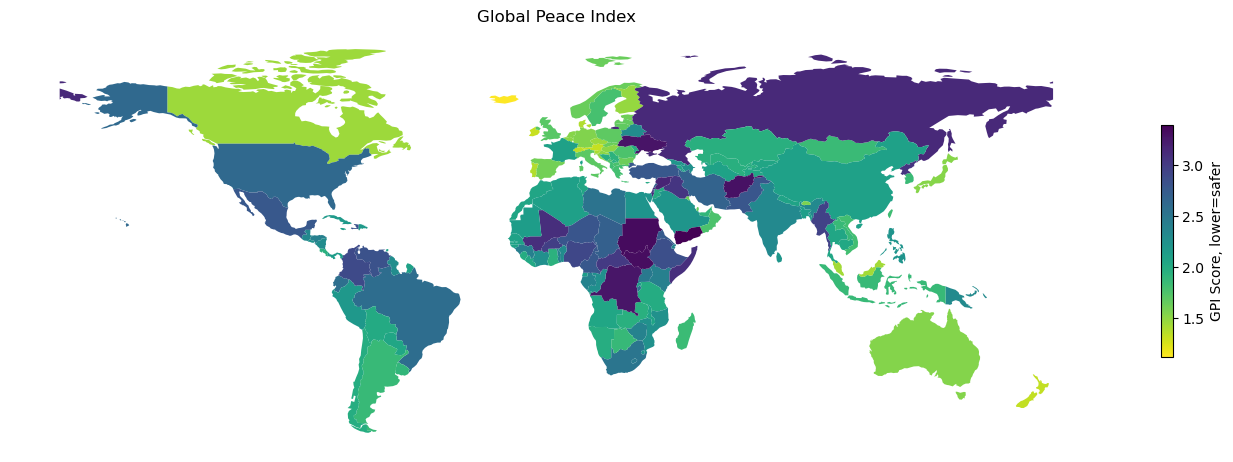

In [35]:
# Set up the color map and normalization based on score values
cmapr = plt.cm.viridis_r #so that yellow will be worse and blue better
norm = mcolors.Normalize(vmin=GPI['score'].min(), vmax=GPI['score'].max())

#Plot the GPI
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
worlddata.plot(column='score', cmap=cmapr, linewidth=0.8, ax=ax)

#Scale bar
sm = plt.cm.ScalarMappable(cmap=cmapr, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, fraction = 0.01)
cbar.set_label('GPI Score, lower=safer')

#Titles
ax.set_title('Global Peace Index')
ax.axis('off')  # Turn off axis lines and labels

plt.show()

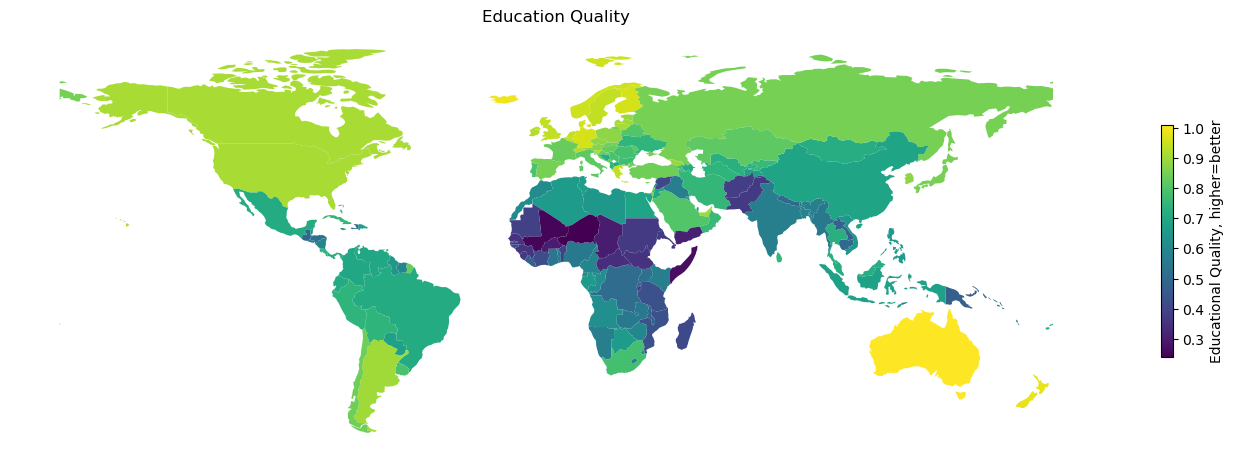

In [36]:
# Set up the color map and normalization based on score values
cmap = plt.cm.viridis
norm2 = mcolors.Normalize(vmin=edu['Ed 2022'].min(), vmax=edu['Ed 2022'].max())

#Plot the educational data
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
worlddata.plot(column='Ed 2022', cmap=cmap, linewidth=0.8, ax=ax)

#Scale bar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm2)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, fraction = 0.01)
cbar.set_label('Educational Quality, higher=better')

#Titles
ax.set_title('Education Quality')
ax.axis('off')  # Turn off axis lines and labels

plt.show()

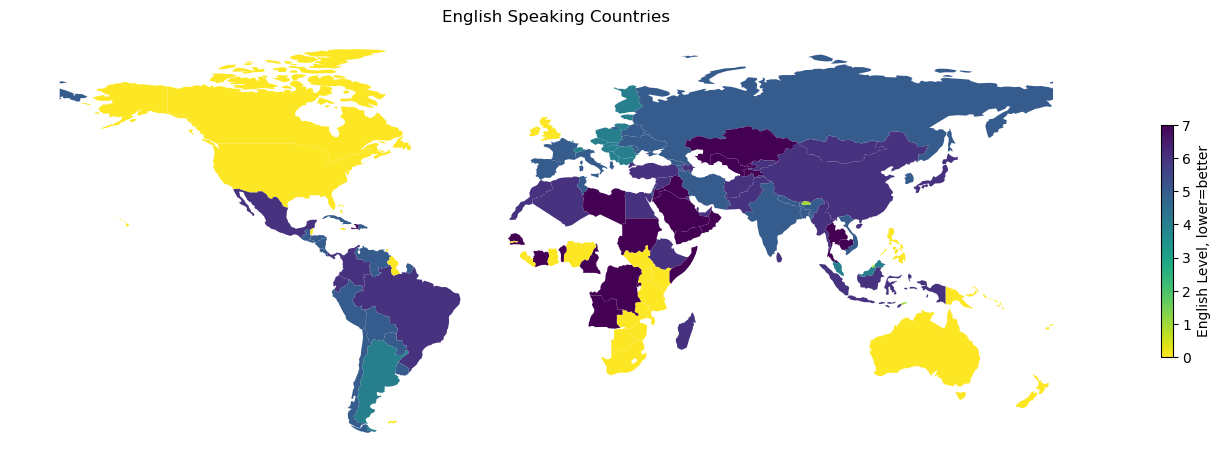

In [37]:
#English
# Set up the color map based on the English Bands
norm3 = mcolors.Normalize(vmin=worlddata['EngBandNumeric'].min(), vmax=worlddata['EngBandNumeric'].max())

#Plot the English data
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
worlddata.plot(column='EngBandNumeric', cmap= cmapr, linewidth=0.8, ax=ax)

#Scale bar
sm = plt.cm.ScalarMappable(cmap= cmapr, norm=norm3)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, fraction = 0.01)
cbar.set_label('English Level, lower=better')

#Titles
ax.set_title('English Speaking Countries')
ax.axis('off')  # Turn off axis lines and labels

plt.show()

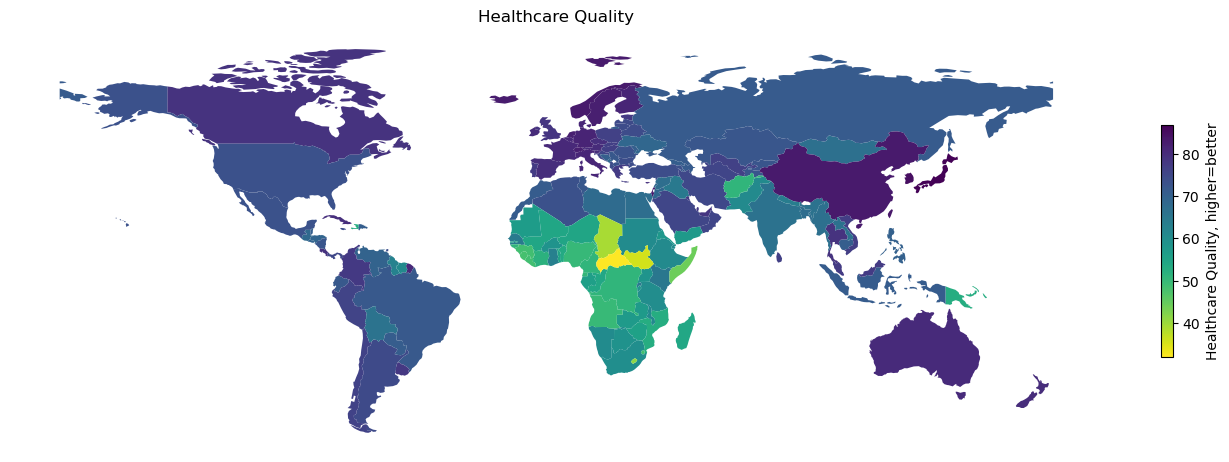

In [42]:
# Set up the color map and normalization based on score values

norm3 = mcolors.Normalize(vmin=health['LP Index Health Score 2023'].min(), vmax=health['LP Index Health Score 2023'].max())

#Plot the health data
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
worlddata.plot(column='LP Index Health Score 2023', cmap=cmapr, linewidth=0.8, ax=ax)

#Scale bar
sm = plt.cm.ScalarMappable(cmap=cmapr, norm=norm3)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, fraction = 0.01)
cbar.set_label('Healthcare Quality, higher=better')

#Titles
ax.set_title('Healthcare Quality')
ax.axis('off')  # Turn off axis lines and labels

plt.show()

# Set Limits

In [47]:
#View stats for a specific country
def viewstats(country):
    row = worlddata[worlddata['Master Name'] == country]
 
    if row.empty:
        print(f"No data found for Country: {master_name}")
        return
    if len(row) > 1:
        print(f"More than one row found for Country: {master_name}")
        return
    
    #print GPI
    score = row['score'].values[0]
    print(f"GPI: {score} (lower=better)")

    #Print English Level
    eng_level = row['EngBand'].values[0]
    print(f"English Level: {eng_level}")

    #Print Healthcare Level
    hscore = row['LP Index Health Score 2023'].values[0]
    print(f"Health: {hscore} (higher=better)")
    
    #Show the educational data, with trend
    years = ['2017', '2018', '2019', '2020', '2021', '2022']
    education_columns = ['Ed 2017', 'Ed 2018', 'Ed 2019', 'Ed 2020', 'Ed 2021', 'Ed 2022']
    education_values = row[education_columns].values.flatten()

    # Plot the line graph
    plt.figure(figsize=(5, 3))
    plt.plot(years, education_values, marker='o', linestyle='-', color='b', label='Education Levels')
    plt.title(f"Education Quality Trend for {country}")
    plt.xlabel('Year')
    plt.ylabel('Education Quality')
    plt.grid(True)
    plt.legend()
    plt.show()

GPI: 3.115 (lower=better)
English Level: Moderate
Health: 83.1 (higher=better)


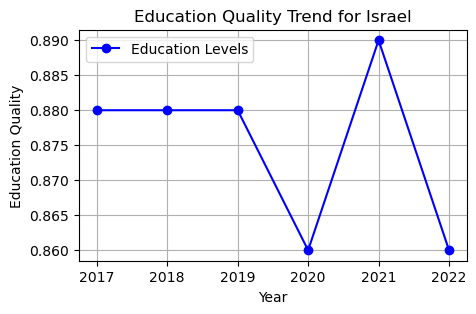

In [48]:
viewstats('Israel')

GPI: 2.622 (lower=better)
English Level: Native
Health: 73.26 (higher=better)


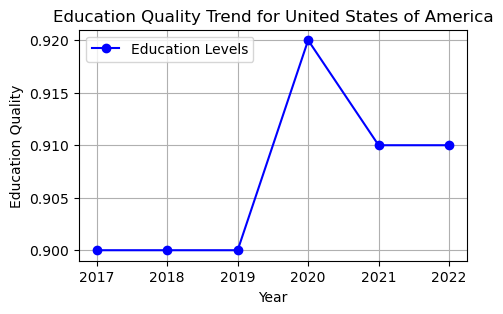

In [49]:
viewstats('United States of America')

GPI: 1.449 (lower=better)
English Level: Native
Health: 78.88 (higher=better)


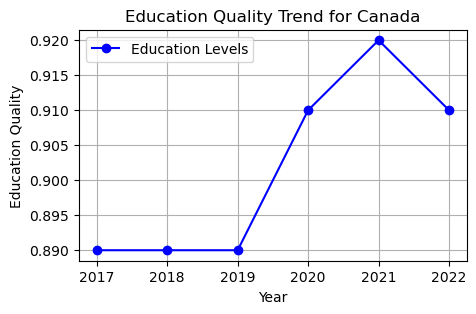

In [50]:
viewstats('Canada')

# Find all reasonable countries

Below is the block to set limits that you want. If you want to see the stats for your country in order to give you perspective, change the Israel, USA, or Canada block above to see your country.

In [78]:
#set generous limits
GPIlim = 2.63 #at least as safe as the USA
Edlim = .85 #at least as educated as Israel
Englim = 5 #at least as English as Israel
healthlim = 73 #at least as good healthcare as the USA

In [79]:
#Generous search- if data isn't available, don't exclude it
generous = worlddata[
    ((worlddata['score'] <= GPIlim) | pd.isna(worlddata['score'])) &  # Score is lim or less, or NaN
    ((worlddata['Ed 2022'] >= Edlim) | pd.isna(worlddata['Ed 2022'])) &  # Ed 2022 is at least lim, or NaN
    ((worlddata['EngBandNumeric'] <= Englim) | pd.isna(worlddata['EngBandNumeric'])) &  # EngBand is at most lim, or NaN
    ((worlddata['LP Index Health Score 2023'] >= healthlim) | pd.isna(worlddata['score']))  # Score is lim or less, or NaN
]

In [80]:
pd.set_option('display.max_rows', None)
print(generous[['Master Name', 'score', 'Ed 2022', 'EngBand', 'LP Index Health Score 2023']].sort_values(by='score'))

                             Master Name  score  Ed 2022    EngBand  \
48                               Iceland  1.112     0.99        nan   
5                                Ireland  1.303     0.92     Native   
15                               Austria  1.313     0.87  Very high   
23                           New Zealand  1.323     0.98     Native   
13                             Singapore  1.339     0.87     Native   
11                           Switzerland  1.350     0.92       High   
30                               Denmark  1.382     0.96  Very high   
43                              Slovenia  1.395     0.91        nan   
3                                 Canada  1.449     0.91     Native   
18                               Czechia  1.459     0.88       High   
19                               Finland  1.474     0.96       High   
10                               Belgium  1.510     0.94  Very high   
6                            Netherlands  1.527     0.94  Very high   
2     

In [81]:
#Strict search- if data isn't available, exclude it
strict = worlddata[
    (worlddata['score'] <= GPIlim) &  # Score is lim or less
    (worlddata['Ed 2022'] >= Edlim) &  # Ed 2022 is at least lim
    (worlddata['EngBandNumeric'] <= Englim) &  # EngBand is at most lim
    (worlddata['LP Index Health Score 2023'] >= healthlim) #healtcare is at least lim
]

In [82]:
pd.set_option('display.max_rows', None)
print(strict[['Master Name', 'score', 'Ed 2022', 'EngBand', 'LP Index Health Score 2023']].sort_values(by='score'))

                 Master Name  score  Ed 2022   EngBand  \
5                    Ireland  1.303     0.92    Native   
23               New Zealand  1.323     0.98    Native   
13                 Singapore  1.339     0.87    Native   
11               Switzerland  1.350     0.92      High   
3                     Canada  1.449     0.91    Native   
18                   Czechia  1.459     0.88      High   
19                   Finland  1.474     0.96      High   
2                  Australia  1.536     1.01    Native   
32                     Spain  1.597     0.85  Moderate   
45                   Estonia  1.615     0.89      High   
41                 Lithuania  1.672     0.91      High   
72                    Poland  1.678     0.88      High   
33            United Kingdom  1.703     0.94    Native   
1                South Korea  1.848     0.88  Moderate   
80                 Argentina  1.855     0.90      High   
14  United States of America  2.622     0.91    Native   

    LP Index 

# Identify importance

In the next block, give your own personal weight to each of the factors for a personalized "overall ranking"
1= least important 5=most important
You can use decimals and multiple items can have the same importance rating.

In [87]:
#rating
GPIrate = 5 #at least as safe as the USA
Edrate = 3.5 #at least as educated as Israel
Engrate = 1 #at least as English as Israel
healthrate = 3.5 #at least as good healthcare as the USA

In [104]:
#create a column with the overall rating for everything
worlddata['combo rating'] = (max(worlddata['score']) - worlddata['score']).fillna(0) * GPIrate #since lower GPI is better
+ worlddata['Ed 2022'].fillna(0) * Edrate + (8-worlddata['EngBandNumeric']).fillna(0) * Engrate #since lower Eng is better
+ (worlddata['LP Index Health Score 2023'].fillna(0) >= healthlim) * healthrate

#make another with the "strict" limits
worlddata['combo strict'] = worlddata['combo rating'].where(worlddata['Country'].isin(strict['Country']), 0)

#and another with the "generous" limits
worlddata['combo generous'] = worlddata['combo rating'].where(worlddata['Country'].isin(generous['Country']), 0)

In [105]:
worlddata.head()

,Country,Health Care Index 2024 (CEOWORLD),Health Care Index 2024 (Numbeo),Health Care Exp Index 2024 (Numbeo),LP Index Health Score 2023,Healthcare Ranking 2022 (US News),Healthcare- WHO Index 2000,nengCountry,englishSpeakingCountries_isPrimary,englishSpeakingCountries_deJure,englishSpeakingCountries_deFacto,englishSpeakingCountries_notes,ESLCountry,Proficiency Score,Proficiency Band,eduCountry,Ed 2022,Ed 2021,Ed 2020,Ed 2019,Ed 2018,Ed 2017,rank,GPICountry,score,featurecla,TYPE,ADMIN,GEOUNIT,ADM0_A3,NAME,NAME_LONG,FORMAL_EN,geometry,CONTINENT,WOE_ID,WOE_ID_EH,Master Name,_merge,EngBand,EngBandNumeric,combo rating,combo strict,combo generous
0,Taiwan,78.72,86.4,158.9,83.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43,Taiwan,1.818,Admin-0 country,Sovereign country,Taiwan,Taiwan,TWN,Taiwan,Taiwan,None,"POLYGON ((121.77782 24.39427, 121.17563 22.790...",Asia,23424971.0,23424971.0,Taiwan,both,nan,NaN,7.895,0.000,7.895
1,South Korea,77.70,83.0,151.9,84.80,17.0,0.759,NaN,NaN,NaN,NaN,NaN,South Korea,525.0,Moderate,South Korea,0.88,0.88,0.88,0.86,0.86,0.86,46,South Korea,1.848,Admin-0 country,Sovereign country,South Korea,South Korea,KOR,South Korea,Republic of Korea,Republic of Korea,"POLYGON ((126.17476 37.74969, 126.23734 37.840...",Asia,23424868.0,23424868.0,South Korea,both,Moderate,5.0,7.745,7.745,7.745
2,Australia,74.11,73.1,132.5,80.36,8.0,0.876,Australia,Yes,No,Yes,NaN,NaN,NaN,NaN,Australia,1.01,1.01,1.01,0.92,0.92,0.92,19,Australia,1.536,Admin-0 country,Country,Australia,Australia,AUS,Australia,Australia,Commonwealth of Australia,"MULTIPOLYGON (((147.68926 -40.80826, 148.28907...",Oceania,-90.0,23424748.0,Australia,both,Native,0.0,9.305,9.305,9.305
3,Canada,71.32,69.1,126.7,78.88,2.0,0.881,Canada,Yes,Yes,Yes,Primary except in Quebec and Nunavut.,NaN,NaN,NaN,Canada,0.91,0.92,0.91,0.89,0.89,0.89,11,Canada,1.449,Admin-0 country,Sovereign country,Canada,Canada,CAN,Canada,Canada,Canada,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025...",North America,23424775.0,23424775.0,Canada,both,Native,0.0,9.740,9.740,9.740
4,Sweden,70.73,68.3,124.9,82.28,1.0,0.908,NaN,NaN,NaN,NaN,NaN,Sweden,609.0,Very high,Sweden,0.94,0.96,0.94,0.92,0.91,0.91,39,Sweden,1.782,Admin-0 country,Sovereign country,Sweden,Sweden,SWE,Sweden,Sweden,Kingdom of Sweden,"POLYGON ((11.02737 58.85615, 11.46827 59.43239...",Europe,23424954.0,23424954.0,Sweden,both,Very high,NaN,8.075,0.000,8.075


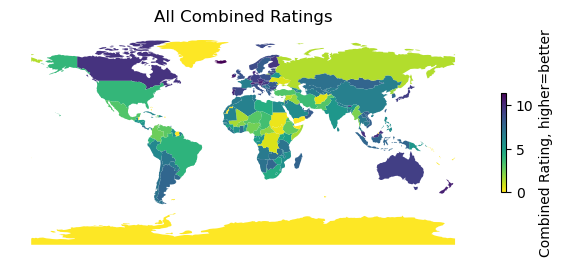

In [114]:
# Set up the color map and normalization based on score values
norm4 = mcolors.Normalize(vmin=0, vmax=worlddata['combo rating'].max()) #since 0 is the minimum

#Plot the rating for everything
fig, ax = plt.subplots(1, 1)
worlddata.plot(column='combo rating', cmap=cmapr, linewidth=0.8, ax=ax)

#Scale bar
sm = plt.cm.ScalarMappable(cmap=cmapr, norm=norm4)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, fraction = 0.01)
cbar.set_label('Combined Rating, higher=better')

#Titles
ax.set_title('All Combined Ratings')
ax.axis('off')  # Turn off axis lines and labels

plt.show()

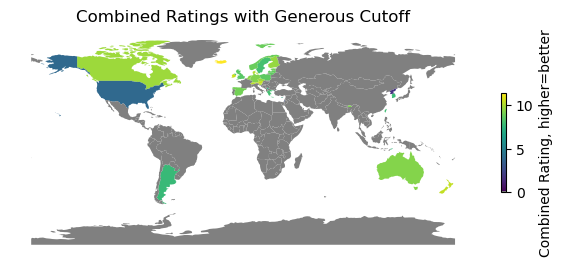

In [126]:
#Make a new colormap where 0 is greyed out and we just see everything else.
viridisr = colormaps.get_cmap('viridis_r')
newcolors = viridis(np.linspace(0, 1, 256))

# Define gray color as RGBA
gray = np.array([128/256, 128/256, 128/256, 1])  # RGB values for gray

# Replace the first 2 colors with gray
newcolors[:2, :] = gray
newcmp = ListedColormap(newcolors)

#Plot the generous ratings
fig, ax = plt.subplots(1, 1)
worlddata.plot(column='combo generous', cmap=newcmp, linewidth=0.8, ax=ax)

#Scale bar
sm = plt.cm.ScalarMappable(cmap=newcmp, norm=norm4)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, fraction = 0.01)
cbar.set_label('Combined Rating, higher=better')

#Titles
ax.set_title('Combined Ratings with Generous Cutoff')
ax.axis('off')  # Turn off axis lines and labels

plt.show()

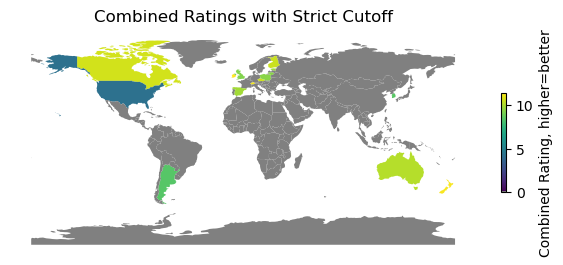

In [127]:
#Plot the strict ratings
fig, ax = plt.subplots(1, 1)
worlddata.plot(column='combo strict', cmap=newcmp, linewidth=0.8, ax=ax)

#Scale bar
sm = plt.cm.ScalarMappable(cmap=newcmp, norm=norm4)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, fraction = 0.01)
cbar.set_label('Combined Rating, higher=better')

#Titles
ax.set_title('Combined Ratings with Strict Cutoff')
ax.axis('off')  # Turn off axis lines and labels

plt.show()

In [131]:
#look at the generous list
pd.set_option('display.max_rows', None)
print(worlddata[worlddata['combo generous'] != 0][['Master Name', 'score', 'Ed 2022', 'EngBand', 'LP Index Health Score 2023', 'combo generous']].sort_values(by='combo generous', ascending=False))

                  Master Name  score  Ed 2022    EngBand  \
48                    Iceland  1.112     0.99        nan   
5                     Ireland  1.303     0.92     Native   
15                    Austria  1.313     0.87  Very high   
23                New Zealand  1.323     0.98     Native   
13                  Singapore  1.339     0.87     Native   
11                Switzerland  1.350     0.92       High   
30                    Denmark  1.382     0.96  Very high   
43                   Slovenia  1.395     0.91        nan   
3                      Canada  1.449     0.91     Native   
18                    Czechia  1.459     0.88       High   
19                    Finland  1.474     0.96       High   
10                    Belgium  1.510     0.94  Very high   
6                 Netherlands  1.527     0.94  Very high   
2                   Australia  1.536     1.01     Native   
7                     Germany  1.542     0.96  Very high   
171                    Bhutan  1.564    

In [132]:
#look at the strict list
pd.set_option('display.max_rows', None)
print(worlddata[worlddata['combo strict'] != 0][['Master Name', 'score', 'Ed 2022', 'EngBand', 'LP Index Health Score 2023', 'combo strict']].sort_values(by='combo strict', ascending=False))


                 Master Name  score  Ed 2022   EngBand  \
5                    Ireland  1.303     0.92    Native   
23               New Zealand  1.323     0.98    Native   
13                 Singapore  1.339     0.87    Native   
11               Switzerland  1.350     0.92      High   
3                     Canada  1.449     0.91    Native   
18                   Czechia  1.459     0.88      High   
19                   Finland  1.474     0.96      High   
2                  Australia  1.536     1.01    Native   
32                     Spain  1.597     0.85  Moderate   
45                   Estonia  1.615     0.89      High   
41                 Lithuania  1.672     0.91      High   
72                    Poland  1.678     0.88      High   
33            United Kingdom  1.703     0.94    Native   
1                South Korea  1.848     0.88  Moderate   
80                 Argentina  1.855     0.90      High   
14  United States of America  2.622     0.91    Native   

    LP Index 

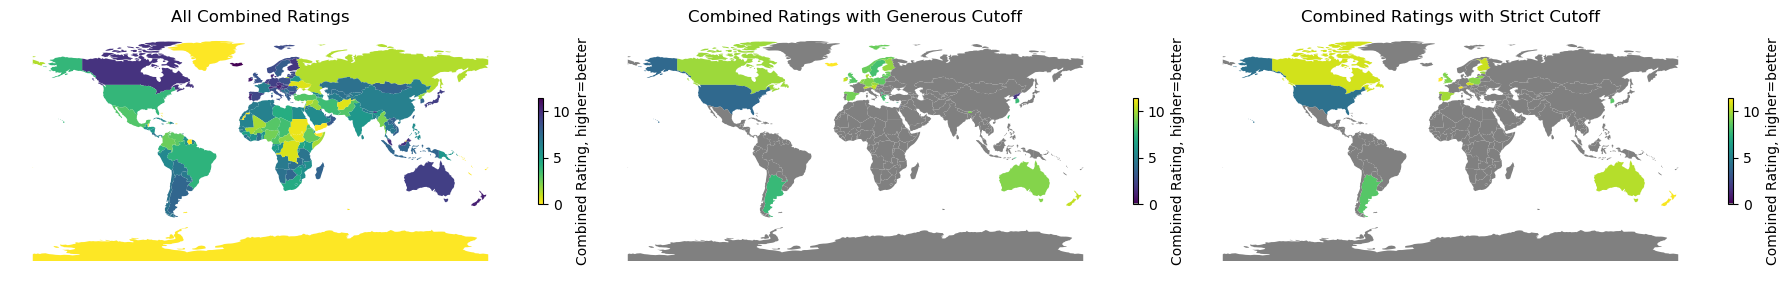

In [137]:
#Look at the maps together
# Set up the color map and normalization based on score values
norm4 = mcolors.Normalize(vmin=0, vmax=worlddata['combo rating'].max()) #since 0 is the minimum

#Make a new colormap where 0 is greyed out and we just see everything else.
viridisr = colormaps.get_cmap('viridis_r')
newcolors = viridis(np.linspace(0, 1, 256))

# Define gray color as RGBA
gray = np.array([128/256, 128/256, 128/256, 1])  # RGB values for gray

# Replace the first 2 colors with gray
newcolors[:2, :] = gray
newcmp = ListedColormap(newcolors)


#set up plot area
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

#Plot the rating for everything
worlddata.plot(column='combo rating', cmap=cmapr, linewidth=0.8, ax=axs[0])
#Scale bar
sm = plt.cm.ScalarMappable(cmap=cmapr, norm=norm4)
sm.set_array([])
cbar = fig.colorbar(sm, ax=axs[0], fraction = 0.01)
cbar.set_label('Combined Rating, higher=better')
#Titles
axs[0].set_title('All Combined Ratings')
axs[0].axis('off')  # Turn off axis lines and labels


#Plot the generous ratings
worlddata.plot(column='combo generous', cmap=newcmp, linewidth=0.8, ax=axs[1])
#Scale bar
sm = plt.cm.ScalarMappable(cmap=newcmp, norm=norm4)
sm.set_array([])
cbar = fig.colorbar(sm, ax=axs[1], fraction = 0.01)
cbar.set_label('Combined Rating, higher=better')
#Titles
axs[1].set_title('Combined Ratings with Generous Cutoff')
axs[1].axis('off')  # Turn off axis lines and labels


#plot the strict ratings
worlddata.plot(column='combo strict', cmap=newcmp, linewidth=0.8, ax=axs[2])
#Scale bar
sm = plt.cm.ScalarMappable(cmap=newcmp, norm=norm4)
sm.set_array([])
cbar = fig.colorbar(sm, ax=axs[2], fraction = 0.01)
cbar.set_label('Combined Rating, higher=better')
#Titles
axs[2].set_title('Combined Ratings with Strict Cutoff')
axs[2].axis('off')  # Turn off axis lines and labels

plt.tight_layout()
plt.show()

GPI: 1.303 (lower=better)
English Level: Native
Health: 80.04 (higher=better)


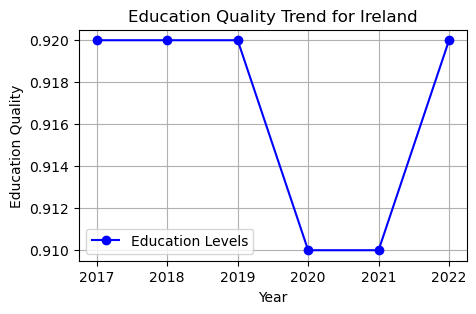

In [138]:
#check out the top contender
viewstats('Ireland')